# Checkpoint 1

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.
- Please do not remove any comment that starts with: "# @@@". 

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.


<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [51]:
data = pd.read_csv("../data/states_edu.csv")

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: *Grade 8 Math*

How many years of data are logged in our dataset? 

In [52]:
# @@@ 1
# Your Code
print(len(set(data["YEAR"])))

33


Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [53]:
# @@@ 2
m_avg = data.groupby('STATE')['AVG_MATH_8_SCORE'].mean()['MICHIGAN']
o_avg = data.groupby('STATE')['AVG_MATH_8_SCORE'].mean()['OHIO']
if(m_avg > o_avg):
   print("MICHIGAN")
else:
   print("OHIO")

OHIO


Find the average for your chosen test across all states in 2019

In [54]:
# @@@ 3
a2019 = data.groupby('YEAR')['AVG_MATH_8_SCORE'].mean()[2019]
print(a2019)

281.2641509433962


For each state, find a maximum value for your chosen test score

In [55]:
# @@@ 4
maxes = {state: float(group['AVG_MATH_8_SCORE'].max()) for state, group in data.groupby('STATE')}
print(maxes)

{'ALABAMA': 269.0, 'ALASKA': 283.0, 'ARIZONA': 283.0, 'ARKANSAS': 279.0, 'CALIFORNIA': 277.0, 'COLORADO': 292.0, 'CONNECTICUT': 289.0, 'DELAWARE': 284.0, 'DISTRICT_OF_COLUMBIA': 269.0, 'DODEA': 293.0, 'FLORIDA': 281.0, 'GEORGIA': 281.0, 'HAWAII': 281.0, 'IDAHO': 287.0, 'ILLINOIS': 285.0, 'INDIANA': 288.0, 'IOWA': 286.0, 'KANSAS': 290.0, 'KENTUCKY': 282.0, 'LOUISIANA': 273.0, 'MAINE': 289.0, 'MARYLAND': 288.0, 'MASSACHUSETTS': 301.0, 'MICHIGAN': 280.0, 'MINNESOTA': 295.0, 'MISSISSIPPI': 274.0, 'MISSOURI': 286.0, 'MONTANA': 293.0, 'NATIONAL': 285.0, 'NEBRASKA': 288.0, 'NEVADA': 278.0, 'NEW_HAMPSHIRE': 296.0, 'NEW_JERSEY': 296.0, 'NEW_MEXICO': 274.0, 'NEW_YORK': 283.0, 'NORTH_CAROLINA': 286.0, 'NORTH_DAKOTA': 293.0, 'OHIO': 290.0, 'OKLAHOMA': 279.0, 'OREGON': 285.0, 'PENNSYLVANIA': 290.0, 'RHODE_ISLAND': 284.0, 'SOUTH_CAROLINA': 282.0, 'SOUTH_DAKOTA': 291.0, 'TENNESSEE': 280.0, 'TEXAS': 290.0, 'UTAH': 287.0, 'VERMONT': 295.0, 'VIRGINIA': 290.0, 'WASHINGTON': 290.0, 'WEST_VIRGINIA': 274.0,

*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [56]:
# @@@ 5
# Example: Calculate per-student expenditure for instruction and total expenditure
if 'instruction_expenditure' in data.columns and 'enroll' in data.columns:
    data['instruction_expenditure_per_student'] = data['instruction_expenditure'] / data['enroll']
if 'total_expenditure' in data.columns and 'enroll' in data.columns:
    data['total_expenditure_per_student'] = data['total_expenditure'] / data['enroll']

Feature engineering justification: **Feature engineering justification: Expenditures per student (both instruction and total) could provide insight into the resources allocated for education and their impact on Grade 8 Math scores.**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

In [ ]:
# @@@ 6
plt.figure(figsize=(10, 6))
data[response_variable].hist(bins=20, color='skyblue', edgecolor='black')
plt.title(f"Distribution of {response_variable}")
plt.xlabel(response_variable)
plt.ylabel("Frequency")
plt.grid(False)
plt.show()

**<Visualization 1: Distribution of Grade 8 Math Scores>**

**Visualization 2**

In [58]:
# @@@ 7
data[response_variable].hist(bins=20, color='skyblue', edgecolor='black')
plt.title(f"Distribution of {response_variable}")
plt.xlabel(response_variable)
plt.ylabel("Frequency")
plt.grid(False)
plt.show()

**<Visualization 2: Per-Student Expenditures vs Grade 8 Math Scores>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
# @@@ 8

X = data[['AVG_READING_8_SCORE', 'AVG_MATH_4_SCORE','AVG_READING_4_SCORE']].dropna()
y = data.loc[X.index]['AVG_MATH_8_SCORE']

In [85]:
# @@@ 9 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [86]:
# @@@ 10
# import your sklearn class here
from sklearn.linear_model import LinearRegression


In [87]:
# @@@ 11
# create your model here
model = LinearRegression()

In [88]:
model.fit(X_train, y_train)

LinearRegression()

In [89]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [90]:
# @@@ 12
model.score(X_test, y_test)
np.mean(model.predict(X_test)-y_test)
np.mean(np.abs(model.predict(X_test)-y_test))
np.mean((model.predict(X_test)-y_test)**2)**0.5


2.4235325024297363

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

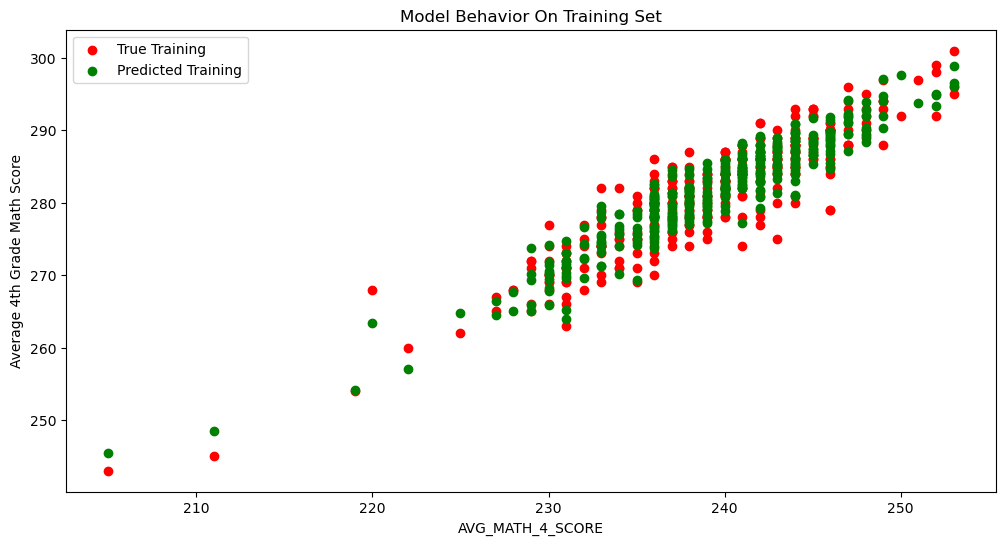

In [93]:
# @@@ 13
col_name = 'AVG_MATH_4_SCORE'


f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Average 4th Grade Math Score')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior On Training Set')

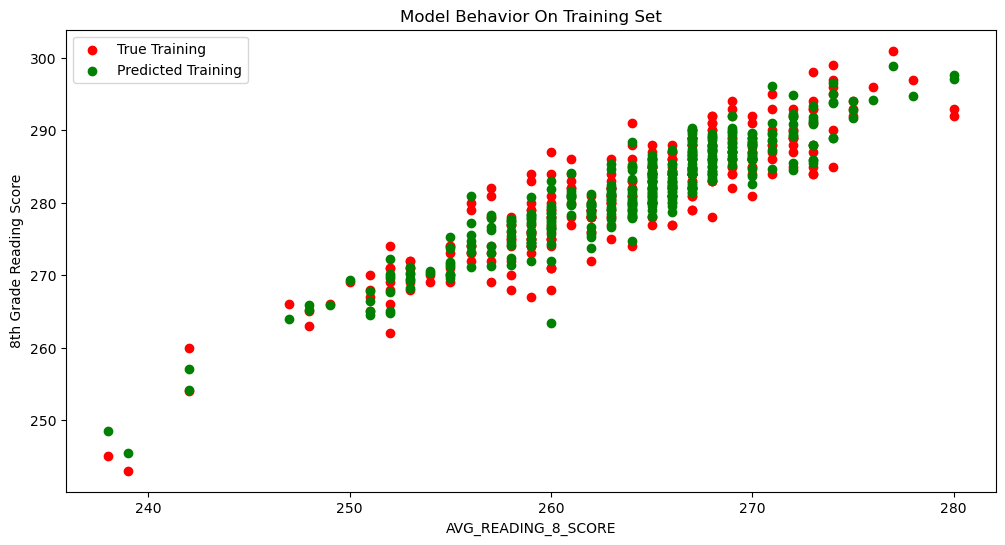

In [94]:
# @@@ 14
col_name = 'AVG_READING_8_SCORE'


f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('8th Grade Reading Score')
plt.title("Model Behavior On Training Set")

